In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('50_Startups.csv')

In [4]:
#shape of dataset
df.shape

(50, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [58]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [59]:
#State is categorical feature, so we perform one hot encoding 
state = pd.get_dummies(df['State'], drop_first= True)

In [60]:
state.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [61]:
data = pd.concat([df, state], axis= 1)

In [62]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0


In [63]:
data.drop('State', axis = 1, inplace =True)

In [64]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [65]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
Florida              uint8
New York             uint8
dtype: object

<Figure size 864x648 with 0 Axes>

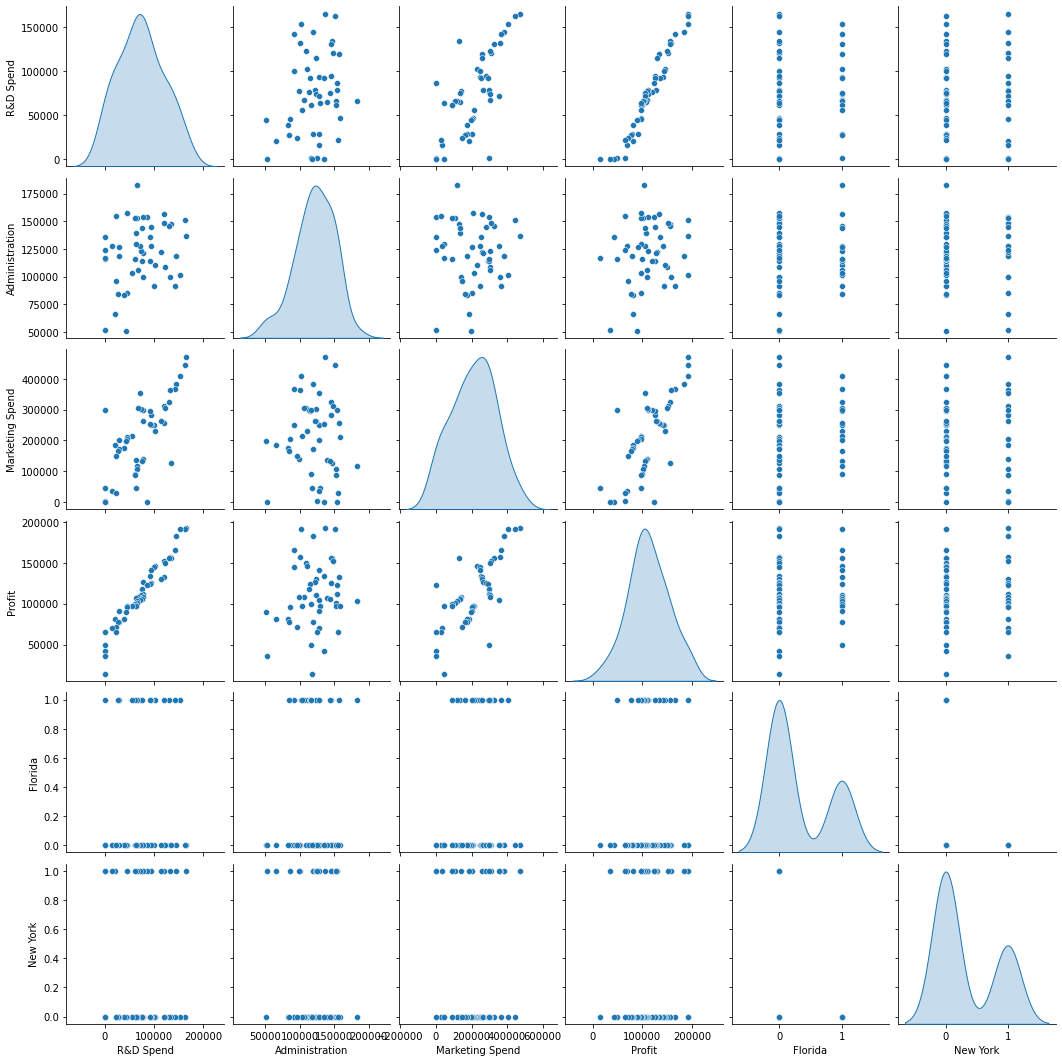

In [66]:
plt.figure(figsize = (12,9))
sns.pairplot(data,diag_kind= 'kde')
plt.show()

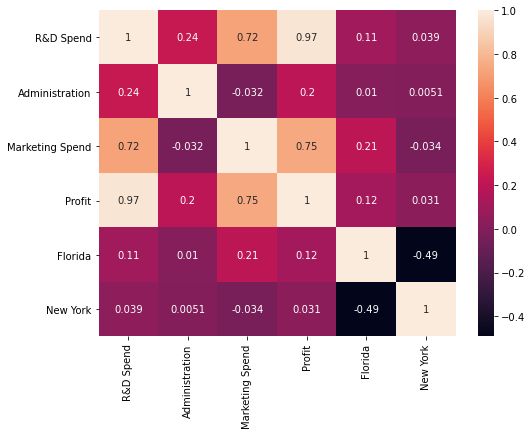

In [67]:
#Let's see the corrlation between feature using heatmap
corr_mat = data.corr()
plt.figure(figsize = (8, 6))
sns.heatmap(corr_mat, annot = True)
plt.show()

In [68]:
print('From the above corralation plot, we can say that there is high relationship between R&D spend - Profit , Marketing Spend - Profit and R&D spend - Marketing Spend.')

From the above corralation plot, we can say that there is high relationship between R&D spend - Profit , Marketing Spend - Profit and R&D spend - Marketing Spend.


In [69]:
#Now splitting dataset into independent variable and dependent varaible
X = data.drop('Profit', axis = 1)
y = data['Profit']

In [70]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [71]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [72]:
#splitting dataset into training and testing data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=30,test_size=.4)

In [73]:
#create regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#now train the model using fit method
regressor.fit(x_train, y_train)
#predict the model
reg_prediction = regressor.predict(x_test)

In [74]:
#Linear Support Vector Regression
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import LinearSVR
svr = LinearSVR()
svr.fit(x_train, y_train)
svr_prediction = svr.predict(x_test)

In [75]:
#KNN Regression
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
knn_prediction = knn.predict(x_test)

In [76]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor() 
dtree.fit(x_train, y_train)
dtree_prediction = dtree.predict(x_test)

In [77]:
#RandomForest Regression
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators= 10)
forest.fit(x_train, y_train)
forest_prediction = forest.predict(x_test)

In [78]:
#Now let's check the performance of the all regression models
from sklearn.metrics import mean_squared_error, r2_score
print("Linear Regression : ")
print("RMSE :  ", np.sqrt(mean_squared_error(y_test, reg_prediction)))
print("Rsquared Score : ", r2_score(y_test, reg_prediction))

print("==="*20)

print("Linear SVR : ")
print("RMSE :  ", np.sqrt(mean_squared_error(y_test, svr_prediction)))
print("Rsquared Score : ", r2_score(y_test, svr_prediction))

print("==="*20)

print("KNN Regression : ")
print("RMSE :  ", np.sqrt(mean_squared_error(y_test, knn_prediction)))
print("Rsquared Score : ", r2_score(y_test, knn_prediction))

print("==="*20)

print("Decision Tree Regression : ")
print("RMSE :  ", np.sqrt(mean_squared_error(y_test, dtree_prediction)))
print("Rsquared Score : ", r2_score(y_test, dtree_prediction))

print("==="*20)

print("Random Forest Regression : ")
print("RMSE :  ", np.sqrt(mean_squared_error(y_test, forest_prediction)))
print("Rsquared Score : ", r2_score(y_test, forest_prediction))

Linear Regression : 
RMSE :   9137.990152794959
Rsquared Score :  0.9347068473282423
Linear SVR : 
RMSE :   19438.599923286245
Rsquared Score :  0.704541675741023
KNN Regression : 
RMSE :   11973.251490143877
Rsquared Score :  0.8879039067653898
Decision Tree Regression : 
RMSE :   5744.85967436543
Rsquared Score :  0.9741937370933437
Random Forest Regression : 
RMSE :   6175.748799157407
Rsquared Score :  0.970177399367577


In [79]:
from tabulate import tabulate

In [80]:
table= [['Model','Rsquared Value'], ['Linear Regression', '0.9347068473282423'], ['Linear SVR', '0.6682887337705818'], ['KNN Regression','0.8879039067653898'], ['Decision Tree Regression', '0.976492539113495'], ['Random Forest Regression','0.9273639203250246']]

In [81]:
print(tabulate(table))

------------------------  ------------------
Model                     Rsquared Value
Linear Regression         0.9347068473282423
Linear SVR                0.6682887337705818
KNN Regression            0.8879039067653898
Decision Tree Regression  0.976492539113495
Random Forest Regression  0.9273639203250246
------------------------  ------------------


We can see that regression models like Linear Regression, DecisionTree Regression and Random Forest Regression gives more than 90% scores where KNN regression 88% scores.